In [76]:
import os
from pathlib import Path 
import traceback
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
import json

import matplotlib.ticker as ticker

# Cost function comparison

We compare the cost functions of between the two versions of the gradient. Specifically:
\
(correct gradient, yes scale_fix) and (wrong gradient, no scale_fix)

### Notes
- Use binary search to get more optimal lr. \
  We know the lr. should be between: 8.33 < lr < 83.33 for all datasets
- Goal: get "nicer" and more interpretable curves


In [77]:
def plot_comparison(data1, data2, label1, label2, title, xs):
    fig, ax = plt.subplots()

    ax.plot(data1, label=label1, c="red", linewidth=1)
    ax.plot(data2, label=label2, c="blue", linewidth=1)

    offset = 1000
    formatter = ticker.FuncFormatter(lambda val, pos: f"{int(val + offset)}")
    ax.xaxis.set_major_formatter(formatter)

    # ax.scatter(xs, data1, label=label1, s=1, color="red")
    # ax.scatter(xs, data2, label=label2, s=1, color="blue")

    label_font_dict = {
        'fontsize': 8,
    }
    ax.set_ylabel("Cost function value", alpha=0.8, fontdict=label_font_dict)
    ax.set_xlabel("Iteration", alpha=0.8, fontdict=label_font_dict)
    ax.set_title(title, alpha=0.8)

    ax.grid()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)

    ax.legend()

    return fig


def plot_experiments(folder_path_1, folder_path_2, title=None, exag=False):
    # NOTE: Change these for different comparisons
    exp_1_cf = np.loadtxt(folder_path_1 + "/cfs.txt")
    exp_2_cf = np.loadtxt(folder_path_2 + "/cfs.txt")


    # If array sizes mismatch, fix it
    if exp_1_cf.shape[0] > exp_2_cf.shape[0]:
        exp_2_cf_padded = np.ones_like(exp_1_cf) * exp_2_cf[-1]    # If there are no more values, just take last value
        exp_2_cf_padded[:exp_2_cf.shape[0]] = exp_2_cf
        exp_2_cf = exp_2_cf_padded
    else:
        # exp_2_cf.shape[0] > exp_1_cf.shape[0]
        exp_1_cf_padded = np.ones_like(exp_2_cf) * exp_1_cf[-1]
        exp_1_cf_padded[:exp_1_cf.shape[0]] = exp_1_cf
        exp_1_cf = exp_1_cf_padded

    # Load experiment details
    json_1 = folder_path_1 + "/data.json"
    with open(json_1, "r") as f:
        details_1 = json.load(f)

    json_2 = folder_path_2 + "/data.json"
    with open(json_2, "r") as f:
        details_2 = json.load(f)

    # NOTE: Remove early exag. ?
    
    lr1 = details_1["learning_rate"]
    lr2 = details_2["learning_rate"]
    exag1 = details_1["ex_iterations"]
    exag2 = details_2["ex_iterations"]

    if not exag:
        # Plot data
        xs = np.arange(exag1, exp_1_cf.shape[0])
        fig = plot_comparison(exp_1_cf[exag1:], exp_2_cf[exag2:], "Wrong gradient", "Correct gradient", title=title, xs=xs)
    else:
        # Plot data
        xs = np.arange(exag1)
        fig = plot_comparison(exp_1_cf[:exag1], exp_2_cf[:exag1], "Wrong gradient", "Correct gradient", title=title, xs=xs)
    
    return fig


In [78]:
def plot_comparison_3(data1, data2, data3, label1, label2, label3, title, xs):
    fig, ax = plt.subplots()

    ax.plot(data1, label=label1, c="red", linewidth=1)
    ax.plot(data2, label=label2, c="orange", linewidth=1)
    ax.plot(data3, label=label3, c="blue", linewidth=1)

    offset = 1000
    formatter = ticker.FuncFormatter(lambda val, pos: f"{int(val + offset)}")
    ax.xaxis.set_major_formatter(formatter)

    # ax.scatter(xs, data1, label=label1, s=1, color="red")
    # ax.scatter(xs, data2, label=label2, s=1, color="blue")

    label_font_dict = {
        'fontsize': 8,
    }
    ax.set_ylabel("Cost function value", alpha=0.8, fontdict=label_font_dict)
    ax.set_xlabel("Iteration", alpha=0.8, fontdict=label_font_dict)
    ax.set_title(title, alpha=0.8)

    ax.grid()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)

    ax.legend()

    return fig

def plot_experiments_3(folder_path_1, folder_path_2, folder_path_3, title=None, exag=False):
    exp_1_cf = np.loadtxt(folder_path_1 + "/cfs.txt")
    exp_2_cf = np.loadtxt(folder_path_2 + "/cfs.txt")
    exp_3_cf = np.loadtxt(folder_path_3 + "/cfs.txt")
    
    # find largest array of values
    max_size = max([exp_1_cf.shape[0], exp_2_cf.shape[0], exp_3_cf.shape[0]])
    print(max_size)
    print(exp_1_cf.shape[0], exp_2_cf.shape[0], exp_3_cf.shape[0])
    print(max(0, max_size - exp_1_cf.shape[0]))
    exp_1_cf = np.pad(exp_1_cf, (0, max(0, max_size - exp_1_cf.shape[0])), mode="constant", constant_values=exp_1_cf[-1])
    exp_2_cf = np.pad(exp_2_cf, (0, max(0, max_size - exp_2_cf.shape[0])), mode="constant", constant_values=exp_2_cf[-1])
    exp_3_cf = np.pad(exp_3_cf, (0, max(0, max_size - exp_3_cf.shape[0])), mode="constant", constant_values=exp_3_cf[-1])
    print(exp_1_cf.shape[0], exp_2_cf.shape[0], exp_3_cf.shape[0])

    # Load experiment details
    json_1 = folder_path_1 + "/data.json"
    with open(json_1, "r") as f:
        details_1 = json.load(f)

    json_2 = folder_path_2 + "/data.json"
    with open(json_2, "r") as f:
        details_2 = json.load(f)

    json_3 = folder_path_3 + "/data.json"
    with open(json_3, "r") as f:
        details_3 = json.load(f)

    # NOTE: Remove early exag. ?
    lr1 = details_1["learning_rate"]
    lr2 = details_2["learning_rate"]
    exag1 = details_1["ex_iterations"]
    exag2 = details_2["ex_iterations"]
    exag3 = details_3["ex_iterations"]

    if not exag:
        # Plot data
        xs = np.arange(exag1, exp_1_cf.shape[0])
        fig = plot_comparison_3(exp_1_cf[exag1:], exp_2_cf[exag2:], exp_3_cf[exag3:], "Wrong, No inv. metric", "Wrong, inv. metric", "Correct, inv. metric", title=title, xs=xs)
    else:
        # Plot data
        xs = np.arange(exag1)
        fig = plot_comparison_3(exp_1_cf[:exag1], exp_2_cf[:exag1], exp_3_cf[:exag3], "Wrong, No inv. metric", "Wrong, inv. metric", "Correct, inv. metric", title=title, xs=xs)
    
    return fig

In [79]:
save_loc = "experiments_thesis/exp_5.1/"

5250
2001 5250 5250
3249
5250 5250 5250


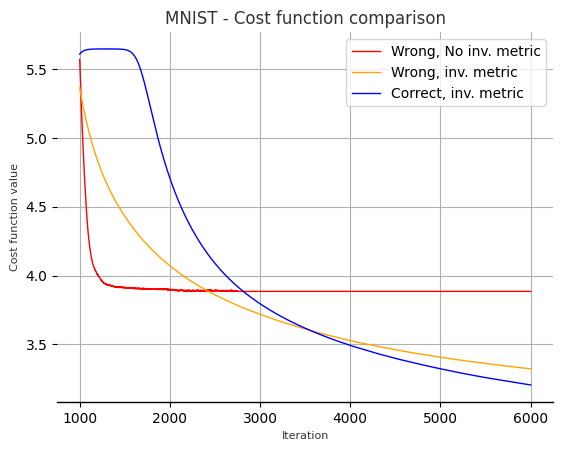

In [80]:
# lr=32 - 3 experiments
wrong_grad_no_scale = "experiments_thesis/HyperbolicKL/MNIST/experiment_9"
wrong_grad_scale = "experiments_thesis/HyperbolicKL/MNIST/experiment_10"
correct_grad_scale = "experiments_thesis/HyperbolicKL/MNIST/experiment_11"
fig = plot_experiments_3(wrong_grad_no_scale, wrong_grad_scale, correct_grad_scale, title="MNIST - Cost function comparison")
fig.savefig(
    save_loc + "mnist_cf_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

## MNIST

In [81]:
# lr of 8.333
# wrong_grad_path_1 = "experiments_thesis/HyperbolicKL/MNIST/experiment_1"
# correct_grad_path_1 = "experiments_thesis/HyperbolicKL/MNIST/experiment_3"
# #plot_experiments(folder_path_1=wrong_grad_path_1, folder_path_2=correct_grad_path_1, title="MNIST - Cost function comparison", exag=True)
# fig = plot_experiments(folder_path_1=wrong_grad_path_1, folder_path_2=correct_grad_path_1, title="MNIST (lr=8.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "mnist_cf_8.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )


# lr of 83.333
# wrong_grad_path_2 = "experiments_thesis/HyperbolicKL/MNIST/experiment_2"
# correct_grad_path_2 = "experiments_thesis/HyperbolicKL/MNIST/experiment_6"
# fig = plot_experiments(folder_path_1=wrong_grad_path_2, folder_path_2=correct_grad_path_2, title="MNIST (lr=83.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "mnist_cf_83.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# lr of 25
# wrong_grad_path_2 = "experiments_thesis/HyperbolicKL/MNIST/experiment_5"
# correct_grad_path_2 = "experiments_thesis/HyperbolicKL/MNIST/experiment_6"
# fig = plot_experiments(folder_path_1=wrong_grad_path_2, folder_path_2=correct_grad_path_2, title="MNIST (lr=25) - Cost function comparison")
# fig.savefig(
#     save_loc + "mnist_cf_83.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# # lr of 32
# wrong_grad_path_3 = "experiments_thesis/HyperbolicKL/MNIST/experiment_7"
# correct_grad_path_3 = "experiments_thesis/HyperbolicKL/MNIST/experiment_8"
# fig = plot_experiments(folder_path_1=wrong_grad_path_3, folder_path_2=correct_grad_path_3, title="MNIST (lr=32) - Cost function comparison")
# fig.savefig(
#     save_loc + "mnist_cf_83.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

## C_ELEGANS

5250
2001 5250 5250
3249
5250 5250 5250


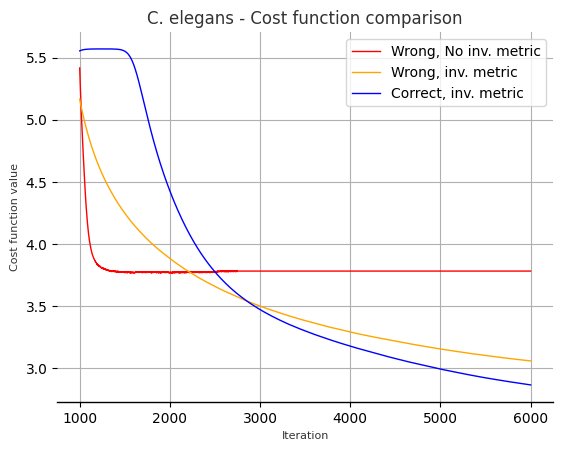

In [82]:
# lr of 8.333
# wrong_grad_path_1 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_1"
# correct_grad_path_1 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_3"
# fig = plot_experiments(folder_path_1=wrong_grad_path_1, folder_path_2=correct_grad_path_1, title="C_ELEGANS (lr=8.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "c_elegans_cf_8.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# # lr of 83.333
# wrong_grad_path_2 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_2"
# correct_grad_path_2 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_4"
# fig = plot_experiments(folder_path_1=wrong_grad_path_2, folder_path_2=correct_grad_path_2, title="C_ELEGANS (lr=83.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "c_elegans_cf_83.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# lr=32 - 3 experiments
path_1 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_7"
path_2 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_8"
path_3 = "experiments_thesis/HyperbolicKL/C_ELEGANS/experiment_9"
fig = plot_experiments_3(path_1, path_2, path_3, title="C. elegans - Cost function comparison")
fig.savefig(
    save_loc + "c_elegans_cf_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

## PLANARIA

10250
2001 10250 10250
8249
10250 10250 10250


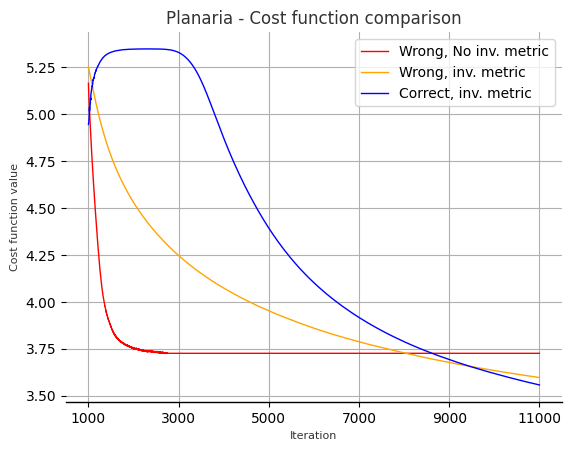

In [87]:
# lr of 8.333
# wrong_grad_path_1 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_1"
# correct_grad_path_1 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_3"
# fig = plot_experiments(folder_path_1=wrong_grad_path_1, folder_path_2=correct_grad_path_1, title="PLANARIA (lr=8.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "planaria_cf_8.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# # lr of 83.333
# wrong_grad_path_2 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_2"
# correct_grad_path_2 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_4"
# fig = plot_experiments(folder_path_1=wrong_grad_path_2, folder_path_2=correct_grad_path_2, title="PLANARIA (lr=83.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "planaria_cf_83.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# lr=32 - 3 experiments
path_1 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_13"
path_2 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_14"
path_3 = "experiments_thesis/HyperbolicKL/PLANARIA/experiment_15"
fig = plot_experiments_3(path_1, path_2, path_3, title="Planaria - Cost function comparison")
fig.savefig(
    save_loc + "planaria_cf_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

## WORDNET

5250
2001 5250 5250
3249
5250 5250 5250


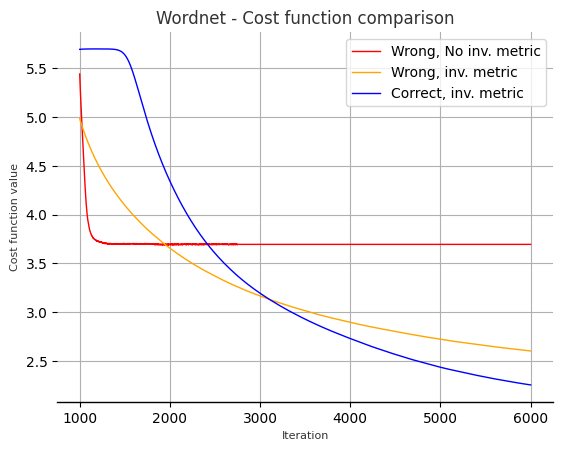

In [84]:
# lr of 8.333
# wrong_grad_path_1 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_1"
# correct_grad_path_1 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_3"
# fig = plot_experiments(folder_path_1=wrong_grad_path_1, folder_path_2=correct_grad_path_1, title="WORDNET (lr=8.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "wordnet_cf_8.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
# )

# # lr of 83.333
# wrong_grad_path_2 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_2"
# correct_grad_path_2 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_4"
# fig = plot_experiments(folder_path_1=wrong_grad_path_2, folder_path_2=correct_grad_path_2, title="WORDNET (lr=83.33) - Cost function comparison")
# fig.savefig(
#     save_loc + "wordnet_cf_83.33.pdf",  # Filename
#     dpi=300,          # Resolution in dots per inch (default is 100)
#     bbox_inches="tight",  # Adjusts the bounding box to fit the content
#     transparent=True  # Saves the figure with a transparent background
#)

path_1 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_5"
path_2 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_6"
path_3 = "experiments_thesis/HyperbolicKL/WORDNET/experiment_7"
fig = plot_experiments_3(path_1, path_2, path_3, title="Wordnet - Cost function comparison")
fig.savefig(
    save_loc + "wordnet_cf_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)